In [7]:

import json
import os
from datetime import datetime

import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio
import torch
from einops import rearrange
import sys
sys.path.append(os.path.abspath("/Users/nisla/codigos/pangaea-bench/"))

from pangaea.datasets.base import RawGeoFMDataset

In [3]:
gdf = gpd.read_file("/Users/nisla/codigos/pangaea-bench/jupyter/metadata.geojson")
# drop geometry column
gdf = gdf.drop(columns="geometry")

In [38]:
gdf

AttributeError: 'NoneType' object has no attribute 'copy'

,Fold,ID_PATCH,N_Parcel,Parcel_Cover,TILE,dates-S1A,dates-S1D,dates-S2,id,geometry
0,1,10000,119,0.808032,t30uxv,"{ ""0"": 20181004, ""1"": 20181010, ""2"": 20181016,...","{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20180924, ""1"": 20180929, ""2"": 20181004,...",10000,"MULTIPOLYGON (((391504.736 6956805.915, 392781..."
1,2,10001,111,0.501986,t30uxv,"{ ""0"": 20181004, ""1"": 20181010, ""2"": 20181016,...","{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20180924, ""1"": 20180929, ""2"": 20181004,...",10001,"MULTIPOLYGON (((367628.562 6880296.822, 368905..."
2,4,10002,131,0.638722,t30uxv,"{ ""0"": 20181004, ""1"": 20181010, ""2"": 20181016,...","{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20180924, ""1"": 20180929, ""2"": 20181004,...",10002,"MULTIPOLYGON (((388950.375 6957003.181, 390227..."
3,5,10003,75,0.866824,t30uxv,"{ ""0"": 20181004, ""1"": 20181010, ""2"": 20181016,...","{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20180924, ""1"": 20180929, ""2"": 20181004,...",10003,"MULTIPOLYGON (((455228.326 6917189.74, 456504...."
4,4,10004,46,0.204906,t30uxv,"{ ""0"": 20181004, ""1"": 20181010, ""2"": 20181016,...","{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20180924, ""1"": 20180929, ""2"": 20181004,...",10004,"MULTIPOLYGON (((364779.509 6910052.243, 366056..."
...,...,...,...,...,...,...,...,...,...,...
2428,2,40558,33,0.783991,t32ulu,"{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20181006, ""1"": 20181012, ""2"": 20181018,...","{ ""0"": 20180917, ""1"": 20180922, ""2"": 20180927,...",40558,"MULTIPOLYGON (((977680.878 6836058.796, 978956..."
2429,5,40559,24,0.129896,t32ulu,"{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20181006, ""1"": 20181012, ""2"": 20181018,...","{ ""0"": 20180917, ""1"": 20180922, ""2"": 20180927,...",40559,"MULTIPOLYGON (((1018204.4 6759608.309, 1019480..."
2430,3,40560,7,0.255358,t32ulu,"{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20181006, ""1"": 20181012, ""2"": 20181018,...","{ ""0"": 20180917, ""1"": 20180922, ""2"": 20180927,...",40560,"MULTIPOLYGON (((1007714.487 6812700.875, 10089..."
2431,3,40561,5,0.054305,t32ulu,"{ ""0"": 20181002, ""1"": 20181008, ""2"": 20181014,...","{ ""0"": 20181006, ""1"": 20181012, ""2"": 20181018,...","{ ""0"": 20180917, ""1"": 20180922, ""2"": 20180927,...",40561,"MULTIPOLYGON (((1002310.153 6766088.52, 100358..."


In [40]:
128*10*128*10

1638400

Fold                                                            4
ID_PATCH                                                    10020
N_Parcel                                                       81
Parcel_Cover                                              0.76651
TILE                                                       t30uxv
dates-S1A       { "0": 20181004, "1": 20181010, "2": 20181016,...
dates-S1D       { "0": 20181002, "1": 20181008, "2": 20181014,...
dates-S2        { "0": 20180924, "1": 20180929, "2": 20181004,...
id                                                          10020
geometry        MULTIPOLYGON (((371850.6598971739 6901802.5670...
Name: 20, dtype: object
10020
MULTIPOLYGON (((371850.6598971739 6901802.567036752, 373127.341100844 6901704.332035726, 373029.10310235934 6900427.6594203245, 371752.43347628246 6900525.888840485, 371850.6598971739 6901802.567036752)))


0    1.640879
1    1.639072
dtype: float64

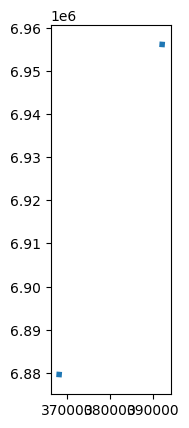

In [39]:
gdf["Fold"].unique()

line = gdf.iloc[20]
print(line)
print(line["ID_PATCH"])


name = line["ID_PATCH"]
print(line.geometry)

# contar quantos poligonos tiene multipoligono

# plot
gdf.iloc[0:2].plot()
# area in km2
gdf.iloc[0:2].geometry.area / 10 ** 6


In [5]:
modality_name = "ndvi"
name = "nico"
"DATA_{}".format(modality_name.upper()), "{}_{}.npy".format(modality_name.upper(), name)

('DATA_NDVI', 'NDVI_nico.npy')

In [8]:
###
# Modified version of the PASTIS-HD dataset
# original code https://github.com/gastruc/OmniSat/blob/main/src/data/Pastis.py
###

import json
import os
from datetime import datetime

import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio
import torch
from einops import rearrange

from pangaea.datasets.base import RawGeoFMDataset


# def prepare_dates(date_dict, reference_date):
#     """Date formating."""
#     if type(date_dict) is str:
#         date_dict = json.loads(date_dict)
#     d = pd.DataFrame().from_dict(date_dict, orient="index")
#     d = d[0].apply(
#         lambda x: (
#             datetime(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:]))
#             - reference_date
#         ).days
#     )
#     return torch.tensor(d.values)

def split_image(image_tensor, nb_split, id):
    """
    Split the input image tensor into four quadrants based on the integer i.
    To use if Pastis data does not fit in your GPU memory.
    Returns the corresponding quadrant based on the value of i
    """
    if nb_split == 1:
        return image_tensor
    # i1 = id // nb_split
    # i2 = id % nb_split
    # height, width = image_tensor.shape[-2:]
    # half_height = height // nb_split
    # half_width = width // nb_split
    # if image_tensor.dim() == 4:
    #     return image_tensor[
    #         :,
    #         :,
    #         i1 * half_height : (i1 + 1) * half_height,
    #         i2 * half_width : (i2 + 1) * half_width,
    #     ].float()
    # if image_tensor.dim() == 3:
    #     return image_tensor[
    #         :,
    #         i1 * half_height : (i1 + 1) * half_height,
    #         i2 * half_width : (i2 + 1) * half_width,
    #     ].float()
    # if image_tensor.dim() == 2:
    #     return image_tensor[
    #         i1 * half_height : (i1 + 1) * half_height,
    #         i2 * half_width : (i2 + 1) * half_width,
    #     ].float()


class Dummy(RawGeoFMDataset):
    def __init__(
        self,
        split: str,
        dataset_name: str,
        multi_modal: bool,
        multi_temporal: int,
        root_path: str,
        classes: list,
        num_classes: int,
        ignore_index: int,
        img_size: int,
        bands: dict[str, list[str]],
        distribution: list[int],
        data_mean: dict[str, list[str]],
        data_std: dict[str, list[str]],
        data_min: dict[str, list[str]],
        data_max: dict[str, list[str]],
        download_url: str,
        auto_download: bool,
    ):
        """Initialize the PASTIS dataset.

        Args:
            split (str): split of the dataset (train, val, test).
            dataset_name (str): dataset name.
            multi_modal (bool): if the dataset is multi-modal.
            multi_temporal (int): number of temporal frames.
            root_path (str): root path of the dataset.

            classes (list): classes of the dataset.
            num_classes (int): number of classes.
            ignore_index (int): index to ignore for metrics and loss.
            img_size (int): size of the image.
            bands (dict[str, list[str]]): bands of the dataset.
            distribution (list[int]): class distribution.
            data_mean (dict[str, list[str]]): mean for each band for each modality.
            Dictionary with keys as the modality and values as the list of means.
            e.g. {"s2": [b1_mean, ..., bn_mean], "s1": [b1_mean, ..., bn_mean]}
            data_std (dict[str, list[str]]): str for each band for each modality.
            Dictionary with keys as the modality and values as the list of stds.
            e.g. {"s2": [b1_std, ..., bn_std], "s1": [b1_std, ..., bn_std]}
            data_min (dict[str, list[str]]): min for each band for each modality.
            Dictionary with keys as the modality and values as the list of mins.
            e.g. {"s2": [b1_min, ..., bn_min], "s1": [b1_min, ..., bn_min]}
            data_max (dict[str, list[str]]): max for each band for each modality.
            Dictionary with keys as the modality and values as the list of maxs.
            e.g. {"s2": [b1_max, ..., bn_max], "s1": [b1_max, ..., bn_max]}
            download_url (str): url to download the dataset.
            auto_download (bool): whether to download the dataset automatically.
        """
        super(Dummy, self).__init__(
            split=split,
            dataset_name=dataset_name,
            multi_modal=multi_modal,
            multi_temporal=multi_temporal,
            root_path=root_path,
            classes=classes,
            num_classes=num_classes,
            ignore_index=ignore_index,
            img_size=img_size,
            bands=bands,
            distribution=distribution,
            data_mean=data_mean,
            data_std=data_std,
            data_min=data_min,
            data_max=data_max,
            download_url=download_url,
            auto_download=auto_download,
        )

        assert split in ["train", "val", "test"], "Split must be train, val or test"
        if split == "train":
            folds = [1, 2, 3]
        elif split == "val":
            folds = [4]
        else:
            folds = [5]
        self.modalities = ["s2"]
        self.nb_split = 1


        self.meta_patch = gpd.read_file(
            os.path.join(self.root_path, "metadata.geojson")
        )

        self.num_classes = 20

        if folds is not None:
            self.meta_patch = pd.concat(
                [self.meta_patch[self.meta_patch["Fold"] == f] for f in folds]
            )

    def __getitem__(self, i: int) -> dict[str, torch.Tensor | dict[str, torch.Tensor]]:
        """Get the item at index i.

    #     Args:
    #         i (int): index of the item.

    #     Returns:
    #         dict[str, torch.Tensor | dict[str, torch.Tensor]]: output dictionary follwing the format
    #         {"image":
    #             {"optical": torch.Tensor,
    #              "sar": torch.Tensor},
    #         "target": torch.Tensor,
    #          "metadata": dict}.
    #     """
        line = self.meta_patch.iloc[i // (self.nb_split * self.nb_split)]
        name = line["ID_PATCH"]
        part = i % (self.nb_split * self.nb_split)
        label = torch.from_numpy(
            np.load(
                os.path.join(self.root_path, "ANNOTATIONS/TARGET_" + str(name) + ".npy")
            )[0].astype(np.int32)
        )
        output = {"label": label, "name": name}

        for modality in self.modalities:
            if modality == "s2":
                modality_name = "s2"
                images = split_image(
                    torch.from_numpy(
                        np.load(
                            os.path.join(
                                self.root_path,
                                "DATA_{}".format(modality_name.upper()),
                                "{}_{}.npy".format(modality_name.upper(), name),
                            )
                        )
                    ),
                    self.nb_split,
                    part,
                ).to(torch.float32)
                output[modality] = images
            
        optical_ts = rearrange(output["s2"], "t c h w -> c t h w")
        # sar_ts = rearrange(output["s1-asc"], "t c h w -> c t h w")

        if self.multi_temporal == 1:
            # we only take the last frame
            optical_ts = optical_ts[:, -1]
            sar_ts = sar_ts[:, -1]
        else:
            # select evenly spaced samples
            optical_indexes = torch.linspace(
                0, optical_ts.shape[1] - 1, self.multi_temporal, dtype=torch.long
            )

            optical_ts = optical_ts[:, optical_indexes]

        return {
            "image": {
                "optical": optical_ts.to(torch.float32),
            },
            "target": output["label"].to(torch.int64),
            "metadata": {},
        }

    def __len__(self) -> int:
        """Return the length of the dataset.

        Returns:
            int: length of the dataset.
        """
        return len(self.meta_patch) * self.nb_split * self.nb_split

    @staticmethod
    def download():
        pass
